In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = "loureiro_energy.csv"
energy_raw = pd.read_csv(data_file)
print(energy_raw.shape)
energy_raw.head()

(46608, 173)


,Time,Energy_Meter_1,Energy_Meter_2,Energy_Meter_3,Energy_Meter_4,Energy_Meter_5,Energy_Meter_6,Energy_Meter_7,Energy_Meter_8,Energy_Meter_9,...,Energy_Meter_163,Energy_Meter_164,Energy_Meter_165,Energy_Meter_166,Energy_Meter_167,Energy_Meter_168,Energy_Meter_169,Energy_Meter_170,Energy_Meter_171,Energy_Meter_172
0,2022-05-05 12:00:00,0.068,NaN,0.034,0.038,0.000,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.395,NaN,NaN,0.008
1,2022-05-05 12:15:00,0.070,NaN,0.044,0.062,0.006,NaN,NaN,NaN,NaN,...,NaN,0.003,0.0,NaN,NaN,NaN,0.316,NaN,NaN,0.056
2,2022-05-05 12:30:00,0.122,NaN,0.037,0.045,0.000,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.264,NaN,NaN,0.033
3,2022-05-05 12:45:00,0.132,NaN,0.015,0.039,0.000,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.139,NaN,NaN,0.062
4,2022-05-05 13:00:00,0.125,NaN,0.015,0.040,0.032,NaN,NaN,NaN,NaN,...,NaN,0.004,0.0,NaN,NaN,NaN,0.138,NaN,NaN,0.024


In [5]:
# data types
energy_raw.dtypes

Time                datetime64[ns]
Energy_Meter_1             float64
Energy_Meter_2             float64
Energy_Meter_3             float64
Energy_Meter_4             float64
                         ...      
Energy_Meter_168           float64
Energy_Meter_169           float64
Energy_Meter_170           float64
Energy_Meter_171           float64
Energy_Meter_172           float64
Length: 173, dtype: object

In [6]:
# casting the type of Time from object to date
energy_raw.Time = pd.to_datetime(energy_raw.Time)

In [7]:
# checking data types again
energy_raw.dtypes

Time                datetime64[ns]
Energy_Meter_1             float64
Energy_Meter_2             float64
Energy_Meter_3             float64
Energy_Meter_4             float64
                         ...      
Energy_Meter_168           float64
Energy_Meter_169           float64
Energy_Meter_170           float64
Energy_Meter_171           float64
Energy_Meter_172           float64
Length: 173, dtype: object

In [17]:
# summary statistics
stats_summary = energy_raw.describe()

In [13]:
# to make sure that each row is added every 15 minutes and we do not miss data
full_date_range = pd.date_range(start="2022-05-05 12:00:00", end="2023-09-02 23:45:00", freq="15min")
# notice the lenght is 46608 matches the no. of rows in the dataset

In [16]:
# to check that all values of the Time column is similar to the generated date range
# no output means it passed the test
assert(full_date_range == energy_raw.Time).all()

<Axes: xlabel='count', ylabel='Count'>

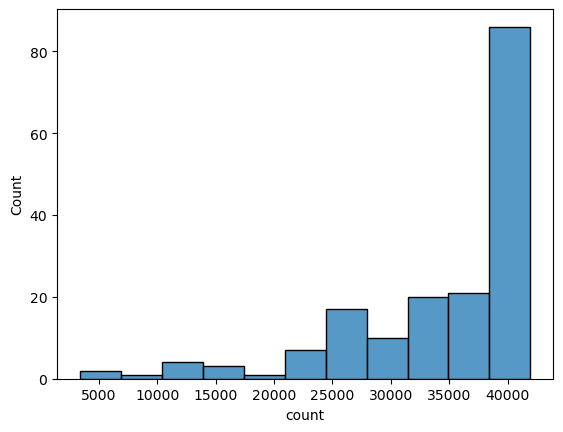

In [18]:
# selecting the first row 0 and all columns starting from the second value 1:
sns.histplot(stats_summary.iloc[0,1:])

In [19]:
# number of duplicates (none)
energy_raw.duplicated().sum()

0

# Missing-Values Analysis

In [ ]:
# setting the index to time column
energy_raw = energy_raw.set_index("Time")

In [24]:
energy_raw.head()

,Energy_Meter_1,Energy_Meter_2,Energy_Meter_3,Energy_Meter_4,Energy_Meter_5,Energy_Meter_6,Energy_Meter_7,Energy_Meter_8,Energy_Meter_9,Energy_Meter_10,...,Energy_Meter_163,Energy_Meter_164,Energy_Meter_165,Energy_Meter_166,Energy_Meter_167,Energy_Meter_168,Energy_Meter_169,Energy_Meter_170,Energy_Meter_171,Energy_Meter_172
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-05 12:00:00,0.068,NaN,0.034,0.038,0.000,NaN,NaN,NaN,NaN,0.007,...,NaN,0.004,0.0,NaN,NaN,NaN,0.395,NaN,NaN,0.008
2022-05-05 12:15:00,0.070,NaN,0.044,0.062,0.006,NaN,NaN,NaN,NaN,0.030,...,NaN,0.003,0.0,NaN,NaN,NaN,0.316,NaN,NaN,0.056
2022-05-05 12:30:00,0.122,NaN,0.037,0.045,0.000,NaN,NaN,NaN,NaN,0.003,...,NaN,0.004,0.0,NaN,NaN,NaN,0.264,NaN,NaN,0.033
2022-05-05 12:45:00,0.132,NaN,0.015,0.039,0.000,NaN,NaN,NaN,NaN,0.022,...,NaN,0.004,0.0,NaN,NaN,NaN,0.139,NaN,NaN,0.062
2022-05-05 13:00:00,0.125,NaN,0.015,0.040,0.032,NaN,NaN,NaN,NaN,0.016,...,NaN,0.004,0.0,NaN,NaN,NaN,0.138,NaN,NaN,0.024


In [62]:
# checking if there is na values
energy_raw.isna().sum(axis=0) # default axis is column 0 for rows set axis=1

Energy_Meter_1       4786
Energy_Meter_2       4860
Energy_Meter_3      14991
Energy_Meter_4       6098
Energy_Meter_5       7092
                    ...  
Energy_Meter_168    12669
Energy_Meter_169    22763
Energy_Meter_170    17071
Energy_Meter_171    19438
Energy_Meter_172     5744
Length: 172, dtype: int64

In [61]:
# to get the total number of missing values use sum() twice and then get the percentage
print(f'The percentage of missing data is {(energy_raw.isna().sum().sum() / energy_raw.size) * 100:.2f}%')

The percentage of missing data is 25.13%


<Axes: ylabel='Count'>

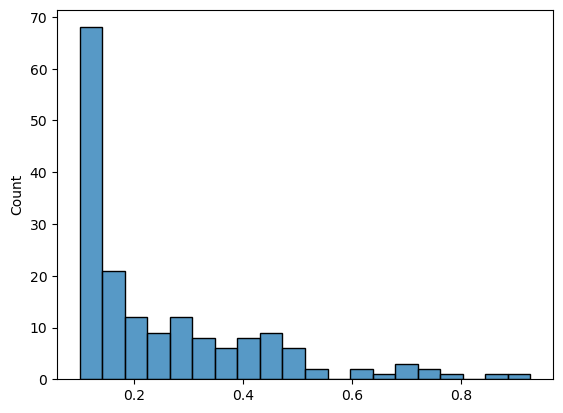

In [64]:
# to get the percentage of missing values by device
perc_by_device = energy_raw.isna().sum()/len(energy_raw)
sns.histplot(perc_by_device, bins=20)

In [65]:
perc_by_device.sort_values(ascending=True)

Energy_Meter_140    0.100154
Energy_Meter_91     0.102300
Energy_Meter_132    0.102321
Energy_Meter_17     0.102364
Energy_Meter_125    0.102493
                      ...   
Energy_Meter_97     0.734359
Energy_Meter_93     0.748884
Energy_Meter_7      0.786775
Energy_Meter_46     0.860990
Energy_Meter_38     0.927802
Length: 172, dtype: float64

Energy_Meter_140
Energy_Meter_91
Energy_Meter_132
Energy_Meter_17
Energy_Meter_125


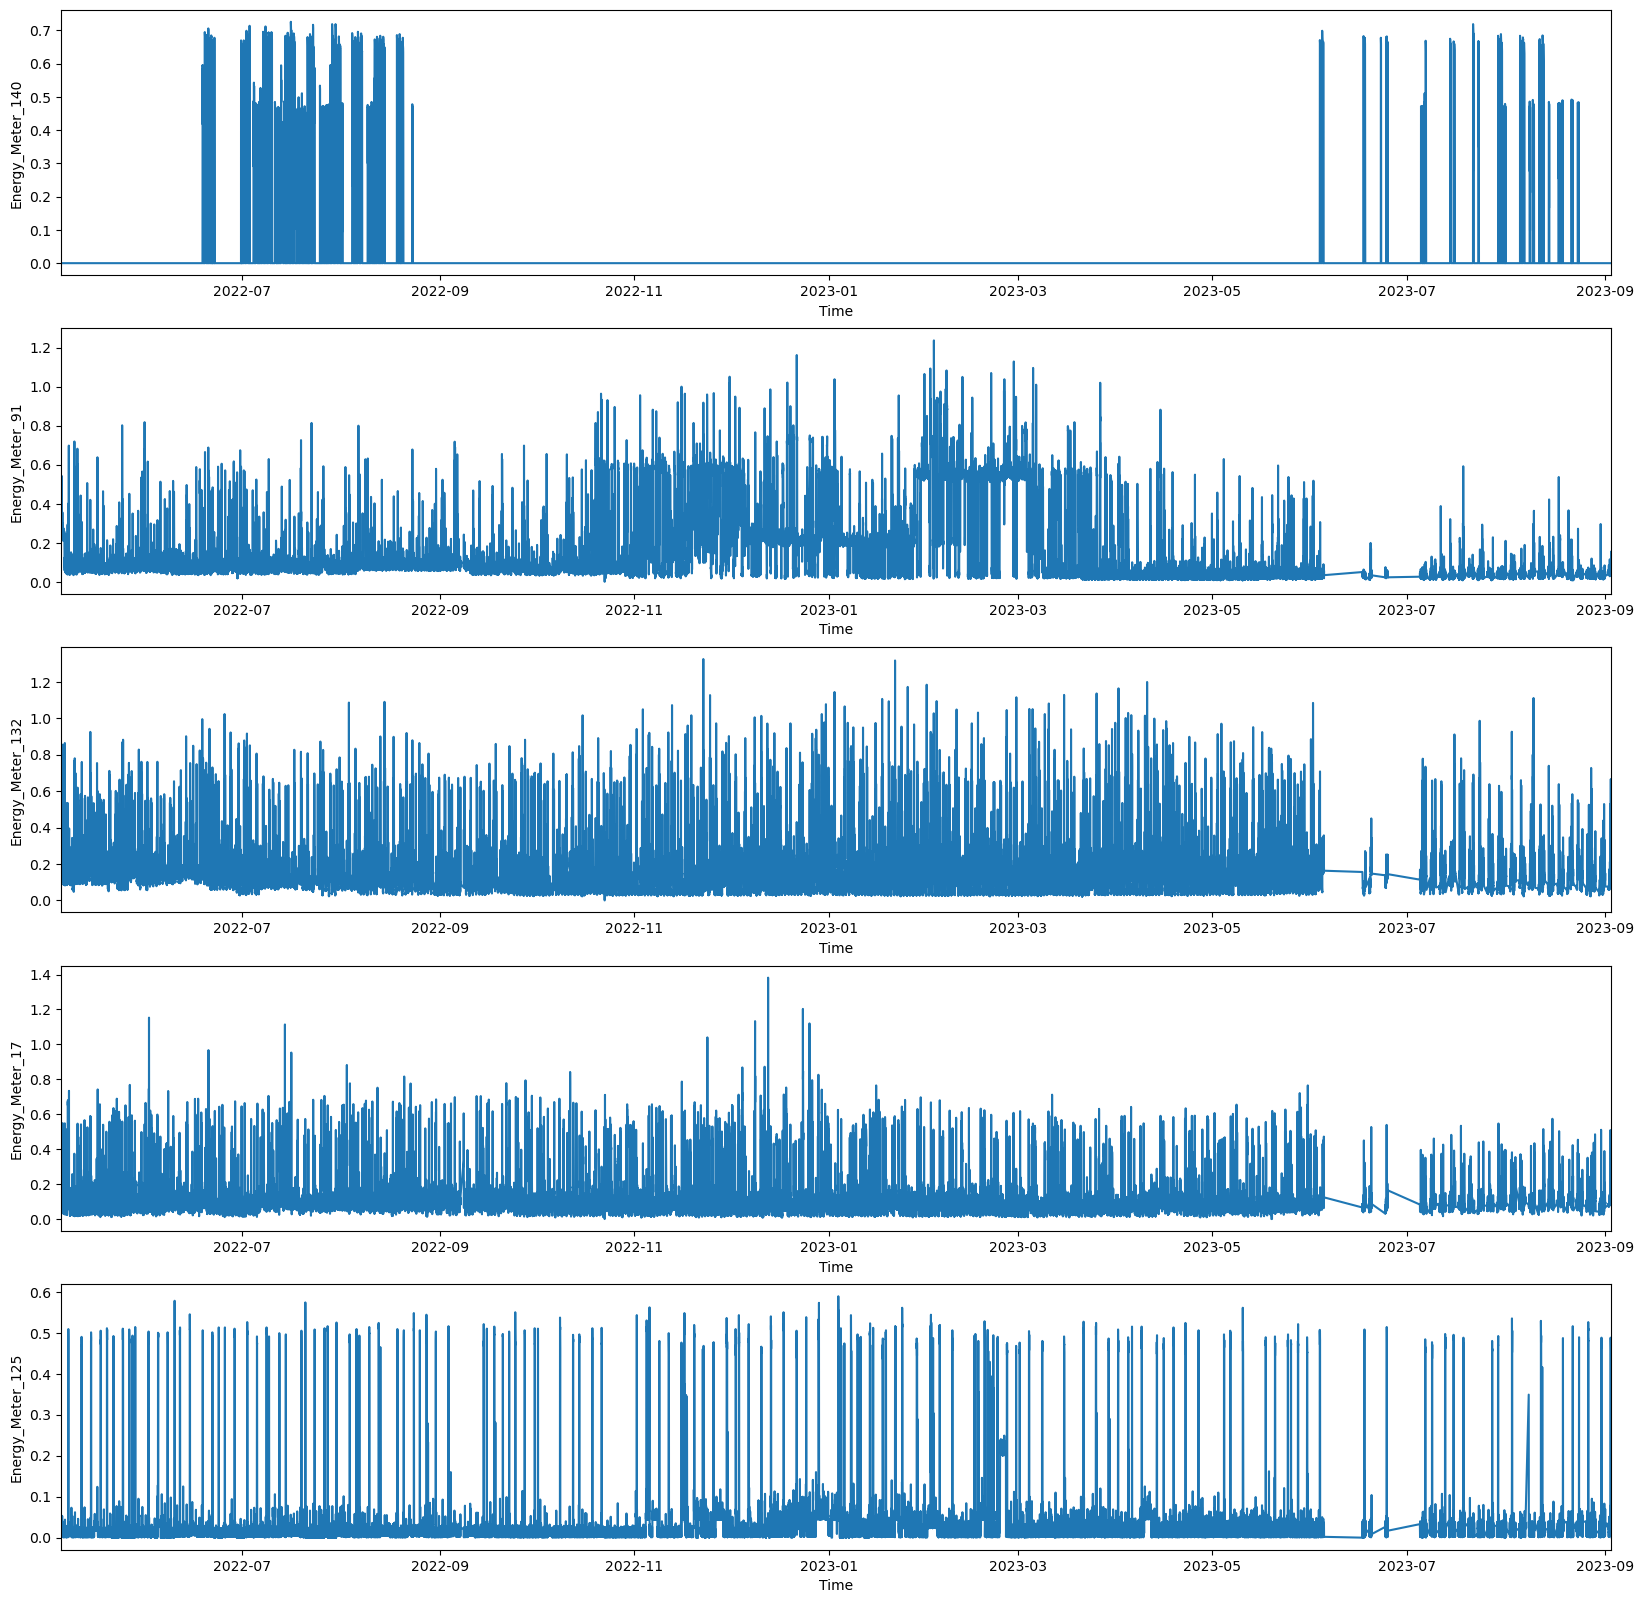

In [66]:
low_values_meters = perc_by_device.sort_values(ascending=True).index[0:5]
fig, ax = plt.subplots(nrows=5, figsize=(20,20))
for i, column in enumerate(low_values_meters):
    print(column)
    plot1 = sns.lineplot(energy_raw[column], ax = ax[i])
    plot1.set_xlim(energy_raw.index.min(), energy_raw.index.max())

Text(0, 0.5, '% devices down')

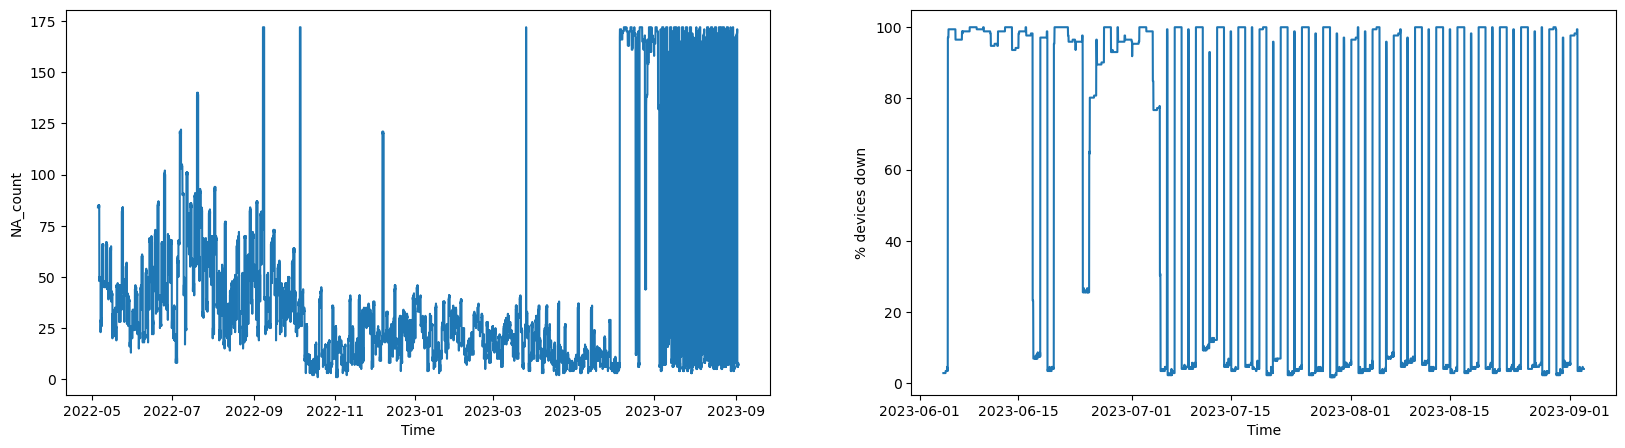

In [72]:
nan_by_date = energy_raw.isna().sum(axis=1)
nan_by_date = nan_by_date.rename("NA_count").reset_index()
perc_nan_by_date = nan_by_date.copy()
perc_nan_by_date.NA_count = 100*perc_nan_by_date.NA_count/172 #energy_raw.shape[1]

fig, ax = plt.subplots(ncols=2, figsize=(20,5))
sns.lineplot(nan_by_date, x="Time", y="NA_count", ax = ax[0])
sns.lineplot(perc_nan_by_date[-8700:], x="Time", y="NA_count", ax = ax[1])
ax[1].set_ylabel("% devices down")

The plot on the left: at the end of the period most devices were out of service.

The plot on the right: zooming on the last period to explore the situation more.

<Axes: >

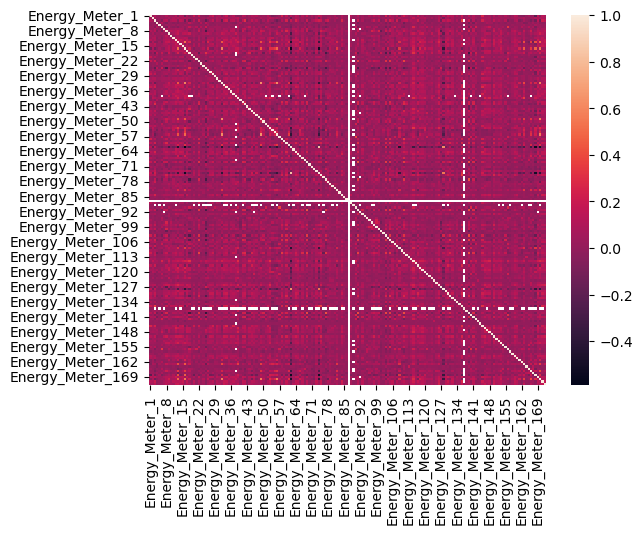

In [75]:
corr_mat = energy_raw.corr() # person correlation coefficient
sns.heatmap(corr_mat)

<Axes: xlabel='Time', ylabel='Energy_Meter_137'>

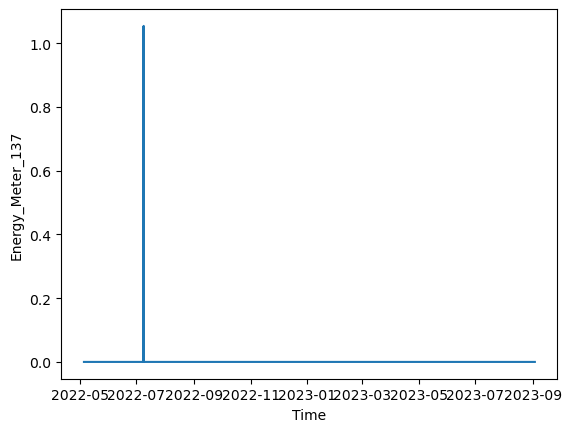

In [79]:
# the horizontal white line at the heatmap # non working devices 87, 137
sns.lineplot(energy_raw["Energy_Meter_137"]) # 

In [87]:
il = np.tril_indices(172)
triangular_correlation = corr_mat.copy().to_numpy()
triangular_correlation[il] = np.nan
triangular_correlation_df = pd.DataFrame(triangular_correlation, columns= corr_mat.columns, index=corr_mat.index)
triangular_correlation_df

,Energy_Meter_1,Energy_Meter_2,Energy_Meter_3,Energy_Meter_4,Energy_Meter_5,Energy_Meter_6,Energy_Meter_7,Energy_Meter_8,Energy_Meter_9,Energy_Meter_10,...,Energy_Meter_163,Energy_Meter_164,Energy_Meter_165,Energy_Meter_166,Energy_Meter_167,Energy_Meter_168,Energy_Meter_169,Energy_Meter_170,Energy_Meter_171,Energy_Meter_172
Energy_Meter_1,NaN,0.028078,0.115541,0.010398,-0.001674,0.045189,0.026084,0.108648,0.020419,0.049444,...,-0.055050,0.006682,0.051611,0.002260,0.030649,-0.218576,0.142029,-0.039801,0.128228,0.083597
Energy_Meter_2,NaN,NaN,0.059194,0.012637,0.027998,0.033551,0.017705,0.038464,0.094731,0.035722,...,0.099250,0.002332,0.003558,0.022607,0.030969,0.097117,0.093672,0.093013,0.106019,0.068984
Energy_Meter_3,NaN,NaN,NaN,-0.036977,0.024649,-0.055819,0.112044,0.141335,-0.020238,0.078368,...,0.074718,-0.002226,-0.033593,-0.095729,0.000494,-0.127227,0.160424,-0.130972,0.206534,0.145596
Energy_Meter_4,NaN,NaN,NaN,NaN,-0.008297,0.132062,-0.006452,-0.067196,0.027745,0.006788,...,-0.062027,-0.058128,0.022030,-0.006557,0.062274,-0.005520,0.046928,-0.029221,-0.011218,-0.014489
Energy_Meter_5,NaN,NaN,NaN,NaN,NaN,-0.000623,0.000996,0.050430,0.024247,0.008590,...,0.072337,-0.001617,-0.003704,0.025247,-0.001865,0.077548,0.037775,0.027226,0.016747,0.023461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Energy_Meter_168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.047074,0.298549,-0.029944,-0.009859
Energy_Meter_169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093731,0.150663,0.120975
Energy_Meter_170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098726,0.125799
Energy_Meter_171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165025


<Axes: >

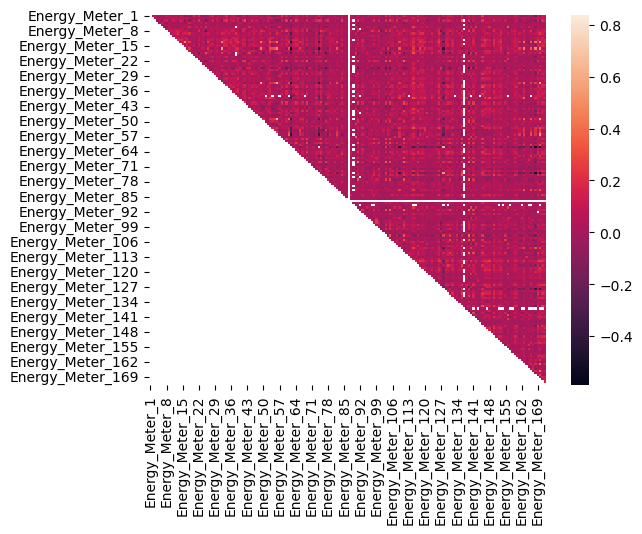

In [88]:
 sns.heatmap(triangular_correlation_df)

In [92]:
show_corr = triangular_correlation_df[(triangular_correlation_df>0.5) & (triangular_correlation_df<1) | (triangular_correlation_df <= 0.5)]

In [93]:
for i in show_corr: # row
    for j, cell in enumerate(show_corr[i]): #col
        if np.isnan(cell) == False:
            print(i, show_corr.columns[j], cell)

Energy_Meter_2 Energy_Meter_1 0.02807769307783167
Energy_Meter_3 Energy_Meter_1 0.11554091858562403
Energy_Meter_3 Energy_Meter_2 0.059193828413237067
Energy_Meter_4 Energy_Meter_1 0.010398170346088847
Energy_Meter_4 Energy_Meter_2 0.012636827800449491
Energy_Meter_4 Energy_Meter_3 -0.0369771987028231
Energy_Meter_5 Energy_Meter_1 -0.0016740308966832452
Energy_Meter_5 Energy_Meter_2 0.02799848662002412
Energy_Meter_5 Energy_Meter_3 0.024649247942134873
Energy_Meter_5 Energy_Meter_4 -0.008297422218991561
Energy_Meter_6 Energy_Meter_1 0.045189282062808374
Energy_Meter_6 Energy_Meter_2 0.03355053783354637
Energy_Meter_6 Energy_Meter_3 -0.05581866468775875
Energy_Meter_6 Energy_Meter_4 0.13206186368236564
Energy_Meter_6 Energy_Meter_5 -0.0006231006975822785
Energy_Meter_7 Energy_Meter_1 0.026083777148968285
Energy_Meter_7 Energy_Meter_2 0.01770528218104553
Energy_Meter_7 Energy_Meter_3 0.11204431797535128
Energy_Meter_7 Energy_Meter_4 -0.006452206094093421
Energy_Meter_7 Energy_Meter_5 0.0

<Axes: xlabel='Time', ylabel='Energy_Meter_49'>

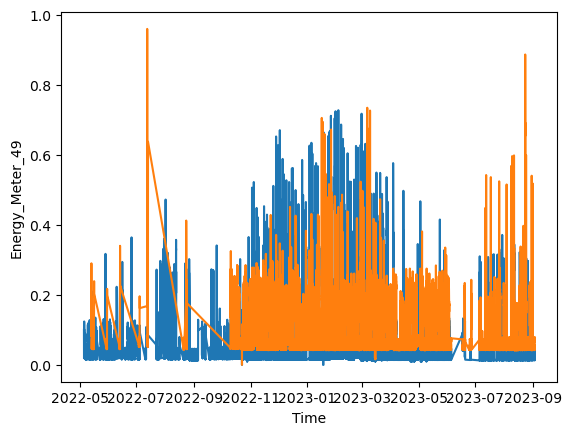

In [95]:
#picking two highly correlated devices and plot their data
sns.lineplot(energy_raw["Energy_Meter_49"])
sns.lineplot(energy_raw["Energy_Meter_32"])

In [102]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

In [106]:
scaled = std_scalar.fit_transform(energy_raw.to_numpy())
energy_df = pd.DataFrame(scaled, columns=energy_raw.columns, index=energy_raw.index)
energy_df.head()

,Energy_Meter_1,Energy_Meter_2,Energy_Meter_3,Energy_Meter_4,Energy_Meter_5,Energy_Meter_6,Energy_Meter_7,Energy_Meter_8,Energy_Meter_9,Energy_Meter_10,...,Energy_Meter_163,Energy_Meter_164,Energy_Meter_165,Energy_Meter_166,Energy_Meter_167,Energy_Meter_168,Energy_Meter_169,Energy_Meter_170,Energy_Meter_171,Energy_Meter_172
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-05 12:00:00,-0.234968,NaN,-0.572023,-0.077290,-0.201075,NaN,NaN,NaN,NaN,-0.334447,...,NaN,0.082047,-0.261512,NaN,NaN,NaN,1.902315,NaN,NaN,-0.559324
2022-05-05 12:15:00,-0.215898,NaN,-0.502566,0.157913,0.207132,NaN,NaN,NaN,NaN,0.528066,...,NaN,-0.546836,-0.261512,NaN,NaN,NaN,1.269976,NaN,NaN,-0.217065
2022-05-05 12:30:00,0.279906,NaN,-0.551186,-0.008689,-0.201075,NaN,NaN,NaN,NaN,-0.484450,...,NaN,0.082047,-0.261512,NaN,NaN,NaN,0.853753,NaN,NaN,-0.381064
2022-05-05 12:45:00,0.375253,NaN,-0.703992,-0.067490,-0.201075,NaN,NaN,NaN,NaN,0.228062,...,NaN,0.082047,-0.261512,NaN,NaN,NaN,-0.146783,NaN,NaN,-0.174282
2022-05-05 13:00:00,0.308510,NaN,-0.703992,-0.057690,1.976031,NaN,NaN,NaN,NaN,0.003058,...,NaN,0.082047,-0.261512,NaN,NaN,NaN,-0.154787,NaN,NaN,-0.445237


In [107]:
energy_df = energy_df.reset_index()

In [111]:
energy_df["monthofyear"] = [str(n).zfill(2)+"-"+m for n, m in zip(energy_df.Time.dt.month, energy_df.Time.dt.month_name())]
energy_df["month"] = energy_df.Time.dt.to_period("M")
energy_df["dayofweek"] = [str(n).zfill(2)+"-"+m for n, m in zip(energy_df.Time.dt.dayofweek, energy_df.Time.dt.day_name())]
energy_df["day"] = energy_df.Time.dt.to_period("D")
energy_df["hour"] = energy_df.Time.dt.to_period("h")
energy_df.head(3)

,Time,Energy_Meter_1,Energy_Meter_2,Energy_Meter_3,Energy_Meter_4,Energy_Meter_5,Energy_Meter_6,Energy_Meter_7,Energy_Meter_8,Energy_Meter_9,...,Energy_Meter_168,Energy_Meter_169,Energy_Meter_170,Energy_Meter_171,Energy_Meter_172,monthofyear,month,dayofweek,day,hour
0,2022-05-05 12:00:00,-0.234968,NaN,-0.572023,-0.077290,-0.201075,NaN,NaN,NaN,NaN,...,NaN,1.902315,NaN,NaN,-0.559324,05-May,2022-05,03-Thursday,2022-05-05,2022-05-05 12:00
1,2022-05-05 12:15:00,-0.215898,NaN,-0.502566,0.157913,0.207132,NaN,NaN,NaN,NaN,...,NaN,1.269976,NaN,NaN,-0.217065,05-May,2022-05,03-Thursday,2022-05-05,2022-05-05 12:00
2,2022-05-05 12:30:00,0.279906,NaN,-0.551186,-0.008689,-0.201075,NaN,NaN,NaN,NaN,...,NaN,0.853753,NaN,NaN,-0.381064,05-May,2022-05,03-Thursday,2022-05-05,2022-05-05 12:00


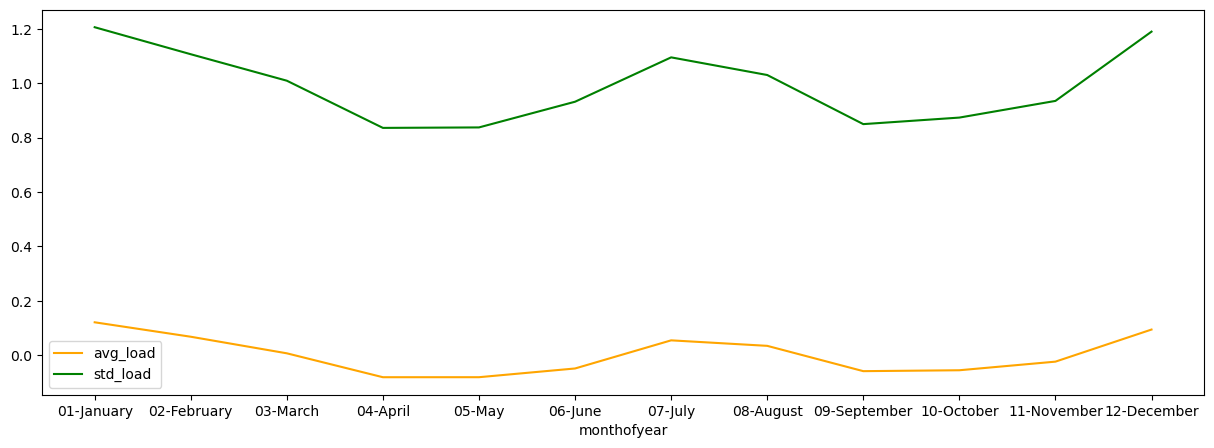

In [126]:
cols = [i for i in energy_raw.columns if i.startswith("Energy_")]
cols.append("monthofyear")
_monthly = energy_df[cols].melt(id_vars="monthofyear")

_monthly_avg_load = _monthly.rename(columns={"value":"avg_load"})[["monthofyear", "avg_load"]]
grouped_avg_monthly = _monthly_avg_load.groupby("monthofyear").mean()

_monthly_std_load = _monthly.rename(columns={"value":"std_load"})[["monthofyear", "std_load"]]
grouped_std_monthly = _monthly_std_load.groupby("monthofyear").std()

fig, ax = plt.subplots(figsize=(15,5))
avg_monthly_plot = sns.lineplot(grouped_avg_monthly, palette=["orange"])
std_monthly_plot = sns.lineplot(grouped_std_monthly, palette=["green"])

<Axes: xlabel='month', ylabel='kWh'>

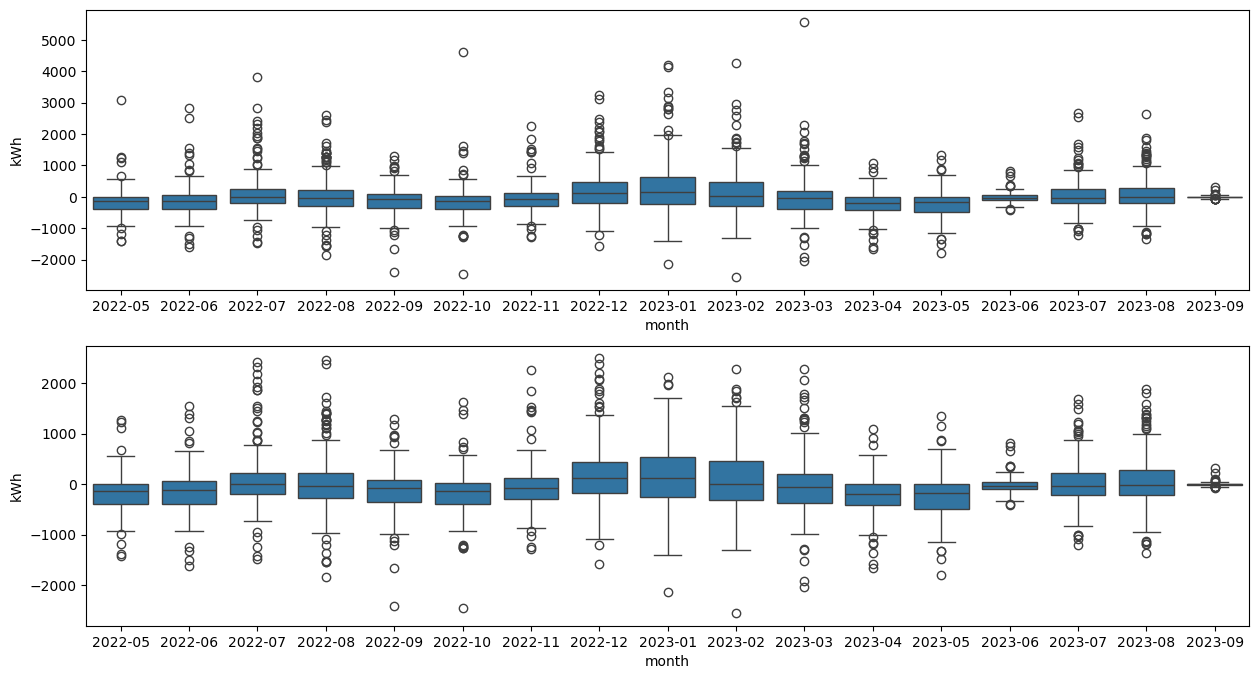

In [129]:
cols = [i for i in energy_df.columns if i.startswith("Energy_")]
cols.append("month")

monthly_usage = energy_df[cols].groupby("month").sum().reset_index()
monthly_usage = monthly_usage.melt(id_vars="month").rename(columns={"variable":"meter_id", "value": "kWh"}) #.set_index("month")

fig, ax = plt.subplots(figsize=(15, 8), nrows=2)
sns.boxplot(monthly_usage, x="month", y="kWh", ax=ax[0]) #palette=["black"], alpha=0.2, legend=None
sns.boxplot(monthly_usage[monthly_usage.kWh<2500], x="month", y="kWh", ax=ax[1]) #, hue="meter_id", palette=["black"], alpha=0.2, legend=None

<Axes: xlabel='dayofweek', ylabel='kWh'>

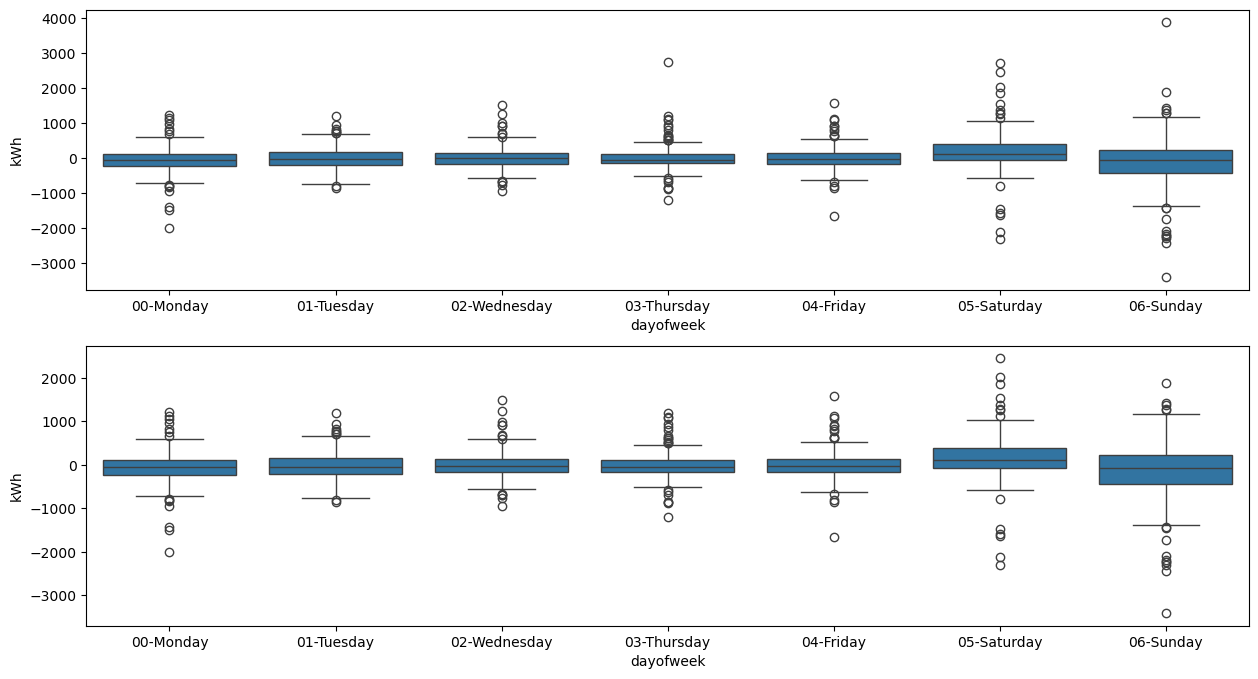

In [131]:
# day of the week
cols = [i for i in energy_df.columns if i.startswith("Energy_")]
cols.append("dayofweek")

weekly_usage = energy_df[cols].groupby("dayofweek").sum().reset_index()
weekly_usage = weekly_usage.melt(id_vars="dayofweek").rename(columns={"variable":"meter_id", "value": "kWh"}) #.set_index("month")

fig, ax = plt.subplots(figsize=(15, 8), nrows=2)
sns.boxplot(weekly_usage, x="dayofweek", y="kWh", ax=ax[0]) #palette=["black"], alpha=0.2, legend=None
sns.boxplot(weekly_usage[weekly_usage.kWh<2500], x="dayofweek", y="kWh", ax=ax[1]) #, hue="meter_id", palette=["black"], alpha=0.2, legend=None

### Sources:

[Dataset](https://data.mendeley.com/datasets/vryvyfz2tj/1)

[YouTube Tutorial](https://www.youtube.com/watch?v=jCYjcEaNfzc)